## 목표 설정
1. 데이터 수집(데이터 제공)
2. 디렉토리에 접근해서 이미지 확인
3. 이미지 읽기 출력 + 이미지 처리
4. 이미지 이름 영한사전 구축
5. 이미지에 맞는 한국어 단어 출력
6. 이미지 블랜딩 - 2 / 3
7. 정답 입력 -> 정답 체크

### 1. 라이브러리 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

#### 1-1. 디렉토리 접근 - os 라이브러리
- os.listdir(경로) : 해당 경로 안에 있는 파일명을 리스트 형태로 묶어서 출력

In [2]:
img_fd = os.listdir('./crawlingDB')
img_fd

['rabbit.jfif',
 'jenny.jfif',
 'poodle.png',
 'icecream.jfif',
 'doraemon.jfif',
 'ryan.jfif',
 'tulip.jfif',
 'pm.jpg',
 'mango.jpg',
 'grape.jpg',
 'tomato.jpg',
 'tteokbokki.jpg',
 'mc.jfif',
 'cherry.jpg',
 'watermelon.jpg',
 'orange.jpg',
 'apple.jpg',
 'zebra.jfif',
 'hamburger.jfif',
 'cat.jfif',
 'melon.jfif',
 'tiger.jfif',
 'rose.jfif']

#### 1-2. 이미지 불러와서 출력

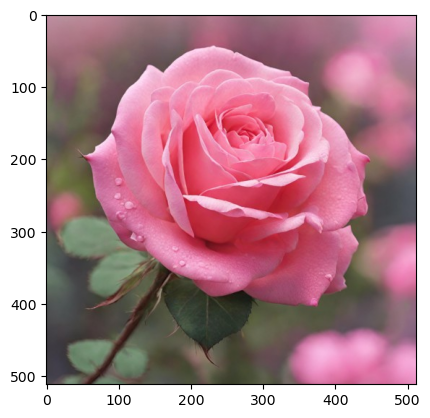

In [3]:
img = cv2.imread(f'./crawlingDB/{img_fd[-1]}')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### 2. 정답 데이터 레이블 사전 구축

#### 2-1. split 진행
- 문자열에서 .을 기준으로 분리 -> 확장자 부분을 제외한 데이터를 가져오기
- 반복문 -> 리스트 Comprehension 활용

In [4]:
img_fd2 = [name.split('.')[0] for name in img_fd]
img_fd2

['rabbit',
 'jenny',
 'poodle',
 'icecream',
 'doraemon',
 'ryan',
 'tulip',
 'pm',
 'mango',
 'grape',
 'tomato',
 'tteokbokki',
 'mc',
 'cherry',
 'watermelon',
 'orange',
 'apple',
 'zebra',
 'hamburger',
 'cat',
 'melon',
 'tiger',
 'rose']

#### 2-2. 수출된 영어 정답에 맞는 한글 정답 만들어주기
1. 영한 번역기 딥러닝 모델을 연결해서 한국어 문자열 생성
2. 수기로 작성하는 방식

In [5]:
korean_name = ['토끼', '제니', '푸들', '아이스크림', '도라에몽', '라이언', '튤립',
               '포메라니안', '망고', '포도', '토마토', '떡볶이', '유재석', '체리',
               '수박', '오렌지', '사과', '얼룩말', '햄버거', '고양이', '멜론', '호랑이', '장미']

#### 2-3. 정답 데이터 연결 -> 딕셔너리 형태로 묶어주기

In [6]:
name_dict = dict(zip(img_fd2, korean_name))
name_dict

{'rabbit': '토끼',
 'jenny': '제니',
 'poodle': '푸들',
 'icecream': '아이스크림',
 'doraemon': '도라에몽',
 'ryan': '라이언',
 'tulip': '튤립',
 'pm': '포메라니안',
 'mango': '망고',
 'grape': '포도',
 'tomato': '토마토',
 'tteokbokki': '떡볶이',
 'mc': '유재석',
 'cherry': '체리',
 'watermelon': '수박',
 'orange': '오렌지',
 'apple': '사과',
 'zebra': '얼룩말',
 'hamburger': '햄버거',
 'cat': '고양이',
 'melon': '멜론',
 'tiger': '호랑이',
 'rose': '장미'}

In [7]:
name_dict['cat']

'고양이'

In [8]:
name_dict[img_fd2[-4]]

'고양이'

#### 2-4. 이미지에 맞는 한국어 단어 출력 알고리즘 구현
- 인덱스 번호 0 고정

In [9]:
rd_int = np.random.randint(0, len(img_fd), size = 1)[0]
rd_int

9

In [10]:
rd_int = np.random.randint(0, len(img_fd), size = 2)
rd_int

array([15, 12])

In [11]:
ext_img = []
ext_name = []
rd_int = np.random.randint(0, len(img_fd), size = 3)

for i in rd_int :
    img_path = f'./crawlingDB/{img_fd[i]}'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    en_name = img_fd[i].split('.')[0]
    ko_name = name_dict[en_name]

    ext_img.append(img_path)
    ext_name.append(ko_name)

print(ext_img)
print(ext_name)

['./crawlingDB/rabbit.jfif', './crawlingDB/hamburger.jfif', './crawlingDB/zebra.jfif']
['토끼', '햄버거', '얼룩말']


In [12]:
img1 = cv2.imread(ext_img[0])
img2 = cv2.imread(ext_img[1])

In [13]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [14]:
img1 = cv2.resize(img1, dsize = (128, 128))
img2 = cv2.resize(img2, dsize = (128, 128))

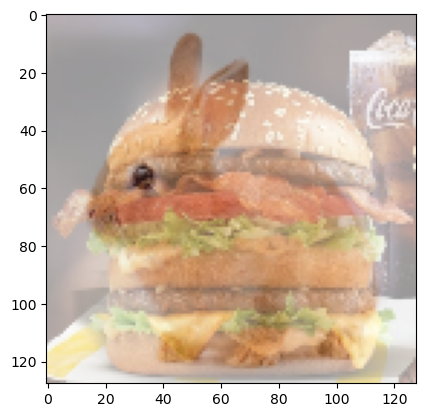

In [15]:
img_add = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)

plt.imshow(img_add)
plt.show()

In [19]:
# 함수를 이용해서 이미지 갯수 지정해주고 상황에 맞는 이미지 블렌딩 실행
def add_img(ext_img, size) :
    if size == 2 :
        img1= cv2.imread(ext_img[0])
        img2= cv2.imread(ext_img[1])
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        img1 = cv2.resize(img1, dsize = (128, 128))
        img2 = cv2.resize(img2, dsize = (128, 128))
        img_add = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
        plt.imshow(img_add)
        plt.show()

    elif size == 3:
        img1= cv2.imread(ext_img[0])
        img2= cv2.imread(ext_img[1])
        img3= cv2.imread(ext_img[2])
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        img1 = cv2.resize(img1, dsize = (128, 128))
        img2 = cv2.resize(img2, dsize = (128, 128))
        img3 = cv2.resize(img2, dsize = (128, 128))
        img_add = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
        img_add = cv2.addWeighted(img_add, 0.5, img3, 0.4, 0)
        plt.imshow(img_add)
        plt.show()

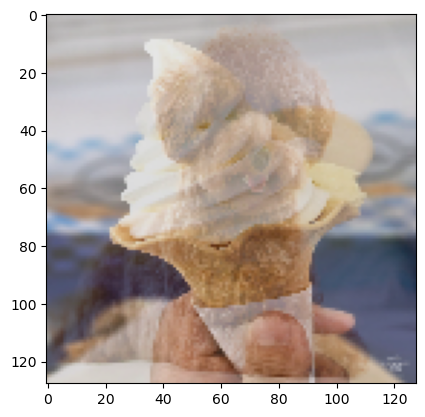

['푸들', '아이스크림', '장미']


In [23]:
input_size = int(input("블렌딩 장수 입력(2 or 3): "))
if input_size < 4 :
    ext_img = []
    ext_name = []
    rd_int = np.random.randint(0, len(img_fd), size = input_size)

    for i in rd_int :
        img_path = f'./crawlingDB/{img_fd[i]}'

        en_name = img_fd[i].split('.')[0]
        ko_name = name_dict[en_name]

        ext_img.append(img_path)
        ext_name.append(ko_name)

    add_img(ext_img = ext_img, size = input_size)

    print(ext_name)

### 3. 출력된 블렌딩 결과 이미지를 보면서 맞추기
- 사용자로부터 단어를 ,로 구분해서 한 번에 입력
- 입력받은 단어를 , 구분자를 이용해 나눈 다음 user_input 리스트에 담아
- user_input 길이 = size -> 아래 내용 진행
- 한 단어씩 ext_name 안에 있는 단어인지 확인하면서 cnt 값을 1씩 증가
- 블렌딩 된 장수만큼 cnt 값이 차면 정답 아니면 오답

In [ ]:
def result(input_size) :
    user_input = input('합쳐진 이미지 장수에 맞춰 단어를 ,로 구분한 후 입력해주세요 >> ').split(',')

    # 문자열 양쪽 공백 제거
    cnt = 0
    if len(user_input) == input_size :
        for i in user_input :
            if i.strip() in ext_name :
                cnt += 1
        
        if cnt != input_size :
            print('오답입니다!')
            return 0
        
        else :
            print('정답입니다!')
            return  1
        
    else :
        print('잘못된 입력입니다!')
        return 0
